In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
import os
path = os.getcwd() + '/ex2data1.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])

Ex. 0.

In [3]:
data.describe()

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


In [4]:
data.head(8)

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
5,45.083277,56.316372,0
6,61.106665,96.511426,1
7,75.024746,46.554014,1


Ex. 1.

In [5]:
X = data.values[:, :2].T
y = data.values[:, 2:].T

theta = np.zeros((X.shape[0]+1, 1))

X = np.concatenate([np.ones([1, X.shape[1]]), X])

for i in range(1, X.shape[0]):
    X[i, :] = (X[i, :] - np.mean(X[i, :])) / (np.std(X[i, :]))

Ex. 2.

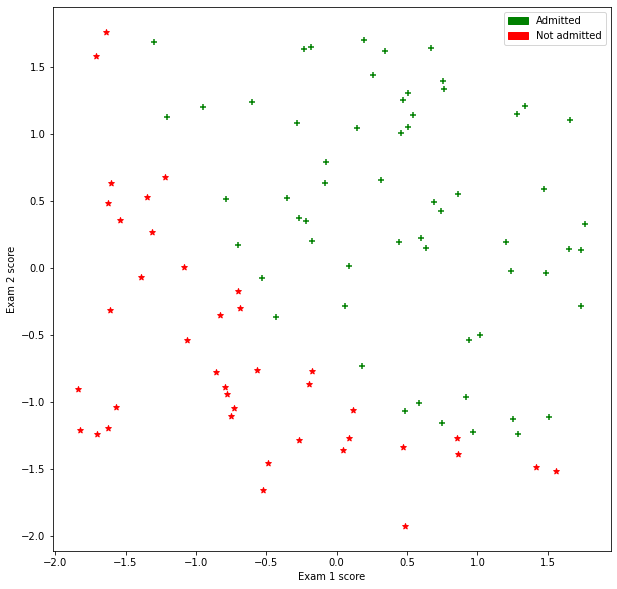

In [6]:
plt.figure(figsize=(10, 10))
for i in range(y.shape[1]):
    if y[0, i] == 1:   
        plt.scatter(X[1, i], X[2, i], marker="+", color='g')
    else:
        plt.scatter(X[1, i], X[2, i], marker='*', color='r')
admitted = mpatches.Patch(color='g', label='Admitted')
not_admitted = mpatches.Patch(color='r', label='Not admitted')
plt.legend(handles=[admitted, not_admitted], loc='upper right')
plt.xlabel("Exam 1 score")
plt.ylabel("Exam 2 score")
plt.show()

Ex. 3.

In [7]:
def sig(t):
    e = 2.72
    result = []
    
    for el in t:
        equ = 1/(1+e**(-el))
        result.append(equ)
        
    return result

Ex. 4.

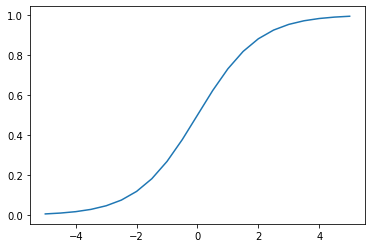

In [8]:
vec = np.arange(-5, 5.5, 0.5)
res_sig = sig(vec)

plt.figure()
plt.plot(vec, res_sig)
plt.show()

Ex. 5.

In [9]:
def cost(theta, X, y):
    h = theta.T @ X
    sig_h = sig(h)
    ones_list = np.ones(y.shape[1])
    J = (-y @ np.log(sig_h).T - (ones_list-y)@np.log(ones_list-sig_h).T) / (X.shape[1])
    return J[0,0]

In [10]:
theta = np.zeros((X.shape[0], 1))
print(cost(theta, X, y))

0.6931471805599453


Ex. 6.

In [11]:
def simple_gradient(X, y, theta, alpha, it):
    cost_t = []
    
    for i in range(it):
        for j in range(theta.shape[0]):
            theta[j, 0] = theta[j, 0] - alpha* ((sig(theta.T @ X)-y) @ np.matrix(X[j, :]).T) / X.shape[1]
            cost_t.append(cost(theta, X, y))
            
        
    return theta, cost_t

In [12]:
alpha = 1
it = 150

[theta, cost_t] = simple_gradient(X, y, theta, alpha, it)
print([theta, cost_t])

[array([[1.42860982],
       [3.37872377],
       [3.13366727]]), [0.6843919201540041, 0.6150661165469501, 0.5590219833732477, 0.5539695091004561, 0.5132770768789208, 0.4797539688060523, 0.47655841634674856, 0.45078960829285586, 0.42922268124288665, 0.4270017126405209, 0.4093735646214372, 0.3945274549978717, 0.3928673765377488, 0.3800473067422614, 0.36925250234851986, 0.3679445971424865, 0.3581800249881389, 0.3499845995168269, 0.3489142879752744, 0.34121103234633154, 0.33477243496589604, 0.3338718680187206, 0.3276269926372668, 0.32242771921609603, 0.32165405803106245, 0.3164809500978353, 0.3121874703233815, 0.3115121760177476, 0.30715128293395316, 0.30353972869200885, 0.3029429156157685, 0.29921324491315404, 0.2961280890579302, 0.29559536842761497, 0.2923666531017741, 0.28969661658173257, 0.28921724045876807, 0.2863931926242937, 0.2840566052947724, 0.28362232609756405, 0.28113014408662446, 0.27906572452242456, 0.2786700667398511, 0.2764536256484039, 0.27461448872691646, 0.2742522678388

Ex. 7.

In [13]:
pred = (sig(theta.T @ X)[0] >= 0.5).astype(int).flatten()
data["Prediction"] = pred
acc = (data['Admitted'] == data['Prediction']).sum() / data.shape[0]
print(acc)



0.89


Ex. 8.

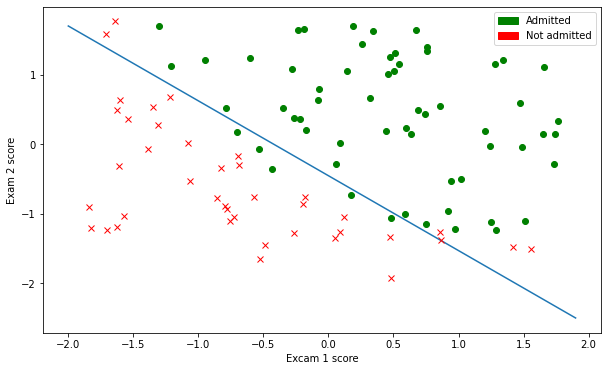

In [14]:
x1 = np.arange(-2.0, 2.0, 0.1)
x2 = -theta[1, 0]/theta[2, 0] * x1 - theta[0, 0]/theta[2, ]
plt.figure(figsize=(10, 6))
plt.plot(x1, x2)
X1_1 = X[1, y[0, :] == 1.0]
X2_1 = X[2, y[0, :] == 1.0]
X1_0 = X[1, y[0, :] == 0.0]
X2_0 = X[2, y[0, :] == 0.0]
plt.plot(X1_1, X2_1, 'o', c='g')
plt.plot(X1_0, X2_0, 'x', c='r')
plt.xlabel("Excam 1 score")
plt.ylabel("Exam 2 score")
admitted = mpatches.Patch(color='g', label='Admitted')
not_admitted = mpatches.Patch(color='r', label='Not admitted')
plt.legend(handles=[admitted, not_admitted], loc='upper right')
plt.show()

# --------------------------------------------

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
from sklearn.metrics import fbeta_score, make_scorer
 
iris = datasets.load_iris()
X = iris.data[:, :2]  # we are analyzing only 2 parameters
Y = iris.target

clf = LogisticRegression(random_state=0).fit(X, Y)

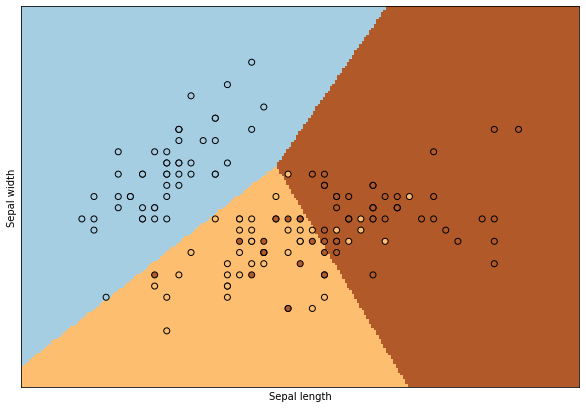

In [16]:
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
h = .02  # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
W = clf.predict(X)
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10, 7))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired, shading = 'auto')
 
# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
 
plt.show()

Ex. 3.

In [17]:
clf.predict_proba(X[:2, :])
clf.score(X, Y)

0.82

Ex. 4.

In [20]:
from sklearn.metrics import accuracy_score, cohen_kappa_score
print("Accuracy score: ", accuracy_score(Y, W))
print("Cohen kappa score: ", cohen_kappa_score(Y, W))

Accuracy score:  0.82
Cohen kappa score:  0.73
